In [11]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [12]:
dt_clf.feature_importances_

array([0.01256535, 0.02915555, 0.05981177, 0.89846733])

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

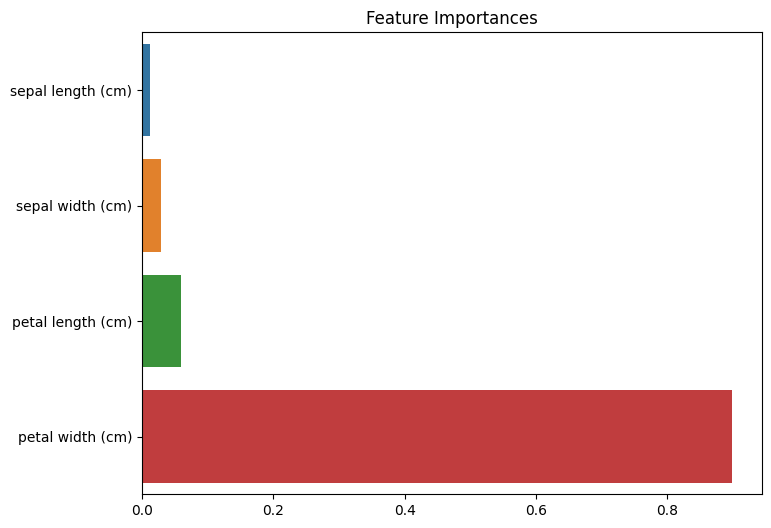

In [14]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)
plt.show()

- feature_importances_ : feature 중요도를 보고 DT에서 petal_length 기준으로 많이 분류할 것이고, 분류시 Information Gain이 높을 것이라고 예상 가능

In [15]:
from sklearn.tree import export_graphviz
# import graphviz

In [16]:
# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot 파일을 생성

tree_dot = export_graphviz(
    dt_clf, 
    out_file='tree.dot',
    feature_names=iris.feature_names, 
    class_names=['0', '1', '2'],
    filled=True
)



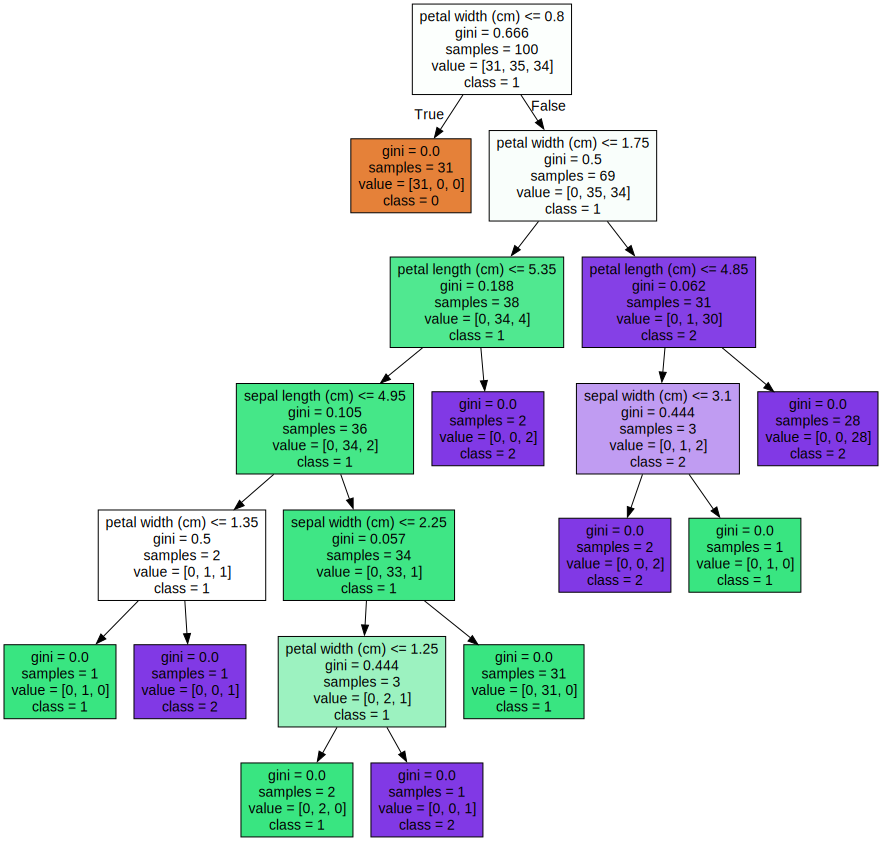

In [17]:
import graphviz


with open("tree.dot") as f:
    dot_graph=f.read()``
graphviz.Source(dot_graph)

> DT 계열에서 Feature 선택

- DT계열에서 feaure_importances_ 라는 attribute를 사용하여 feature 선택 가능 

> DT 단점

- 과대적합 문제 

> Overfitting 방지
- HyperParameter 조정 -> max_depth 등

In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline


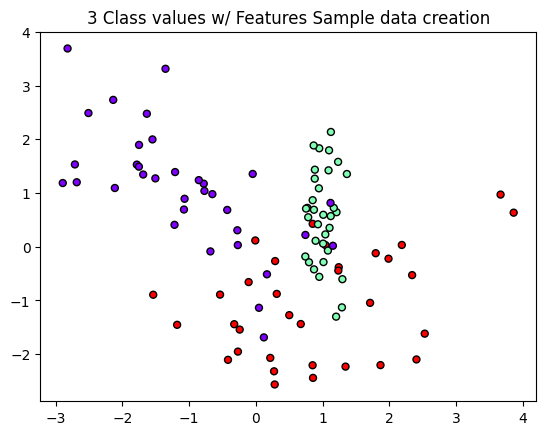

In [21]:
plt.title("3 Class values w/ Features Sample data creation")

# 2차원 시각화를 위해서 feature2개, 결정값 클래스는 3가지 유형의 classfication샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,\
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색으로 표시 
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [22]:
import numpy as np


In [31]:
# Classfier 의 Decision Boundary 를 시각화 하는 함수 
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이터 scatter plot으로 
    ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor ='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model학습
    model.fit(X,y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim = (y.min(), y.max()),
                           zorder=1)


C:\Users\zino0\AppData\Local\Temp\ipykernel_21084\1389346912.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


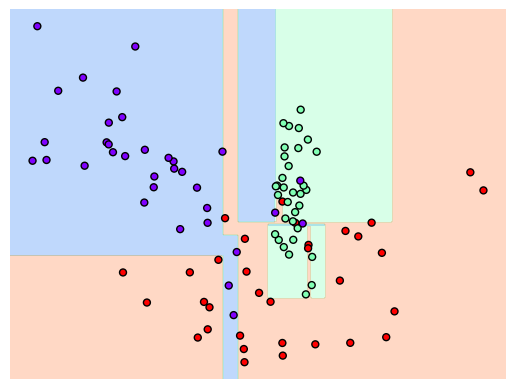

In [32]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=42).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

C:\Users\zino0\AppData\Local\Temp\ipykernel_21084\1389346912.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


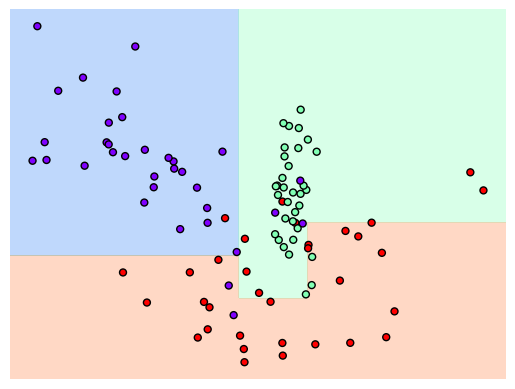

In [34]:
dt_clf = DecisionTreeClassifier(random_state = 42, min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)